In [2]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import json

plt.rcParams['figure.figsize'] = 18,8

In [3]:
def extract_data(path, t, wl, ori = "unk"):
    
    f = h5.File(path, 'r')
    gp = f['spectra'][wl][ori][t]
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    return sp_data, bg_data, powers

def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

In [4]:
file = open('transmission_data.json')
data = file.read()
f_dict = json.loads(data)

data_FESH0450 = f_dict["FESH0450"]
data_FESH0500 = f_dict["FESH0500"]
data_FESH0550 = f_dict["FESH0550"]
data_FESH0600 = f_dict["FESH0600"]
data_FESH0650 = f_dict["FESH0650"]

data_FELH0400 = f_dict["FELH0400"]
data_FELH0450 = f_dict["FELH0450"]
data_FELH0500 = f_dict["FELH0500"]
#data_FESH0550 = f_dict["FESH0550"]
data_FELH0600 = f_dict["FELH0600"]
data_FELH0650 = f_dict["FELH0650"]
data_FELH0700 = f_dict["FELH0700"]
data_FELH0750 = f_dict["FELH0750"]

data_LP272    = f_dict["LP272"]
data_LP325    = f_dict["LP325"]

In [5]:
path_to_repo   = '/home/hargy/Documents/3CS/repo_data3cs/data3cs'
local_to_study = '/studies/mono_leakage'
tot_path       = f'{path_to_repo}{local_to_study}'

#coll1 (raman at 435)

al_h20 = f'{path_to_repo}{local_to_study}/coll1/Al_H20_440.hdf5'
sp_al_h20 = extract_data(al_h20,'20.0sec','435')[0]

black_h20 = f'{path_to_repo}{local_to_study}/coll1/Old_H20_440.hdf5'
sp_black_h20 = extract_data(black_h20,'20.0sec','435')[0]

al_mirr = f'{path_to_repo}{local_to_study}/coll1/Al_MIRR.hdf5'
sp_al_mirr = extract_data(al_mirr,'20.0sec','435')[0]

black_mirr = f'{path_to_repo}{local_to_study}/coll1/Old_MIRR_440.hdf5'
sp_black_mirr = extract_data(black_mirr,'10.0sec','435')[0]

#coll2 (spf=1, exc 300-325)

sp_old_h20_300 = extract_data(f'{path_to_repo}{local_to_study}/coll2/Old_H20_300.hdf5','20.0sec', '300')[0]
sp_old_h20_325 = extract_data(f'{path_to_repo}{local_to_study}/coll2/Old_H20_325.hdf5','20.0sec', '325')[0]
sp_old_mirr_300 = extract_data(f'{path_to_repo}{local_to_study}/coll2/Old_MIRR_300.hdf5','20.0sec', '300')[0]
sp_old_mirr_325 = extract_data(f'{path_to_repo}{local_to_study}/coll2/Old_MIRR_325.hdf5','20.0sec', '325')[0]
sp_old_sp_325 = extract_data(f'{path_to_repo}{local_to_study}/coll2/Old_SP_325.hdf5','20.0sec', '325')[0]

#coll4 (spf=370, or none)
sp_old_h20_370 = extract_data(f'{path_to_repo}{local_to_study}/coll4/Old_H20_.hdf5','10.0sec', '370')[0]
sp_old_h20_no370 = extract_data(f'{path_to_repo}{local_to_study}/coll4/Old_H20_NO370.hdf5','10.0sec', '370')[0]

sp_old_mirr_370 = extract_data(f'{path_to_repo}{local_to_study}/coll4/Old_MIRR_(2).hdf5','10.0sec', '370')[0]
sp_old_mirr_no370 = extract_data(f'{path_to_repo}{local_to_study}/coll4/Old_MIRR_NO370.hdf5','10.0sec', '370')[0]

#coll5 (spf=1, lpf=2, wl=440)
water = extract_data(f'{path_to_repo}{local_to_study}/coll5/H20_440_10_(0).hdf5','10.0sec', '440')[0]
lif = extract_data(f'{path_to_repo}{local_to_study}/coll5/LiF_152_440_10_(0).hdf5','10.0sec', '440')[0]

#coll6 (spf=1, lpf=2, wl=440) plastic
water0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/H20_440_10_(0).hdf5','10.0sec', '440')[0]
lif0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/LiF_152_440_10_(0).hdf5','10.0sec', '440')[0]
qtz0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/QTZ_440_10_(0).hdf5','10.0sec', '440')[0]
sp0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/SP_440_10_(0).hdf5','10.0sec', '440')[0]
caf0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/CaF_440_10_(0).hdf5','10.0sec', '440')[0]
baf0 = extract_data(f'{path_to_repo}{local_to_study}/coll6/BaF_440_10_(0).hdf5','10.0sec', '440')[0]

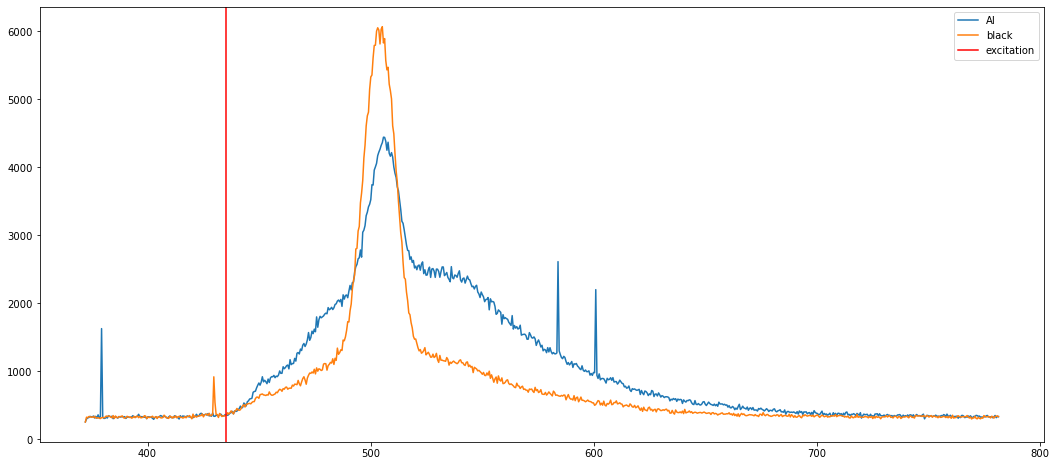

In [6]:
it = 1

plt.plot(sp_al_h20[it]['em_wl'], sp_al_h20[it]['count'],  label = 'Al')
plt.plot(sp_black_h20[it]['em_wl'], sp_black_h20[it]['count'], label = 'black')
#plt.plot(data_FESH0450[0], data_FESH0450[1])
plt.axvline(435,color='red', label='excitation')
plt.legend()

(275.0, 5000.0)

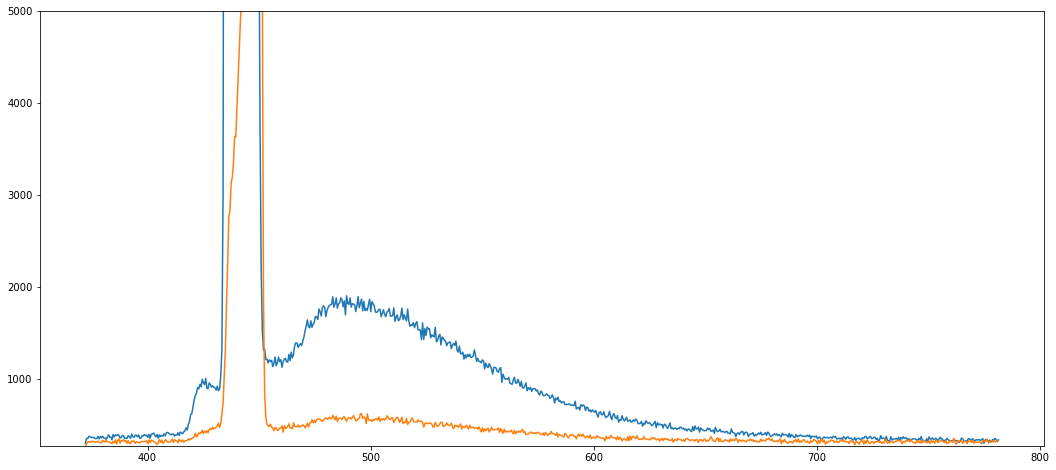

In [7]:
plt.plot(sp_al_mirr[it]['em_wl'], sp_al_mirr[it]['count'])
plt.plot(sp_black_mirr[it]['em_wl'], sp_black_mirr[it]['count'])
plt.ylim(275,5000)

# COLL2

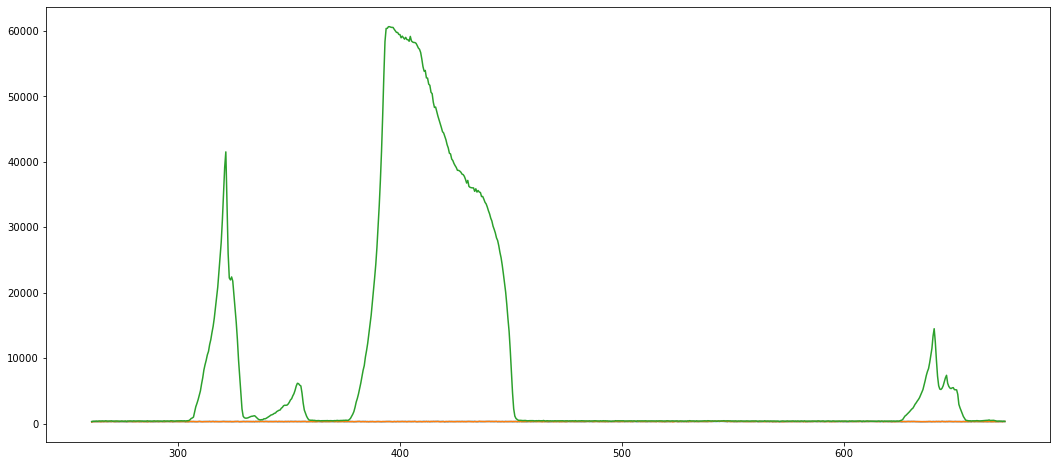

In [8]:
plt.plot(sp_old_h20_325[it]['em_wl'], sp_old_h20_325[it]['count'])
plt.plot(sp_old_sp_325[it]['em_wl'], sp_old_sp_325[it]['count'])
plt.plot(sp_old_mirr_325[it]['em_wl'], sp_old_mirr_325[it]['count'])

# coll4

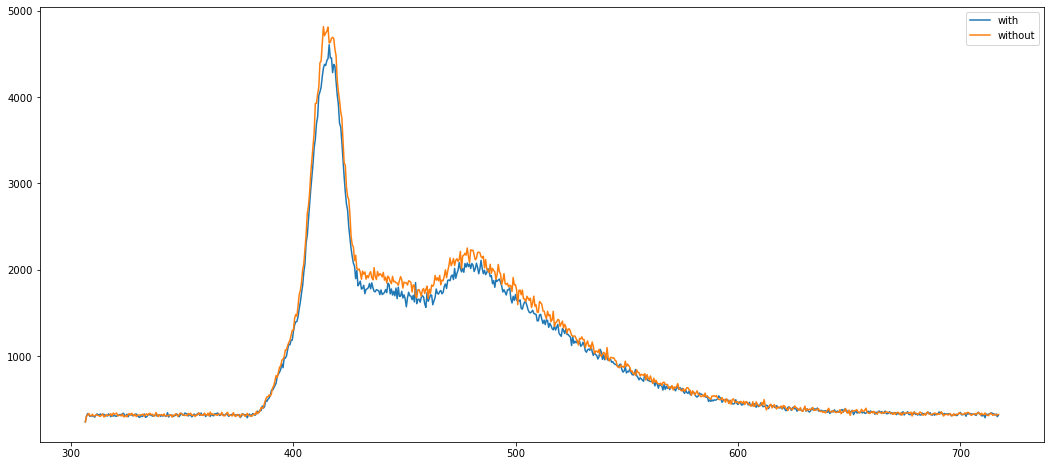

In [9]:
plt.plot(sp_old_h20_370[it]['em_wl'], sp_old_h20_370[it]['count'], label='with')
plt.plot(sp_old_h20_no370[it]['em_wl'], sp_old_h20_no370[it]['count'], label='without')
plt.legend()

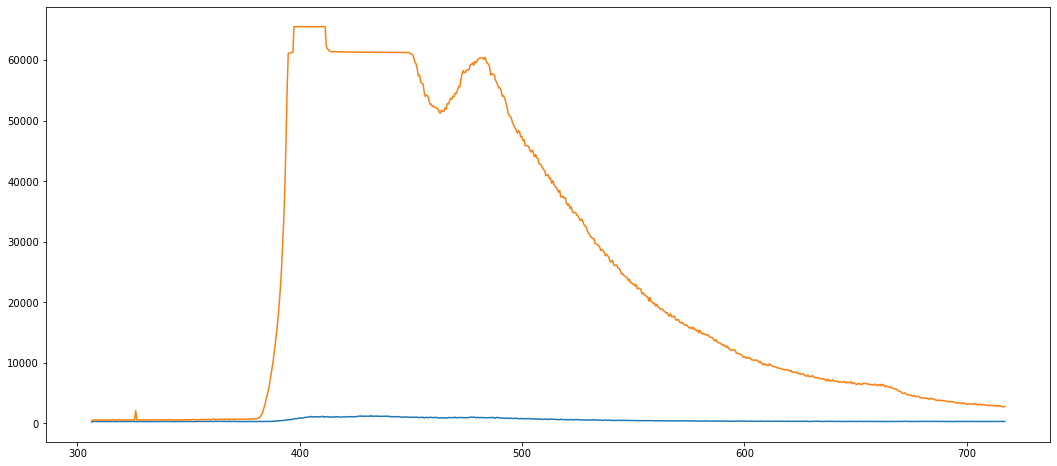

In [16]:
plt.plot(sp_old_mirr_370[it]['em_wl'], sp_old_mirr_370[it]['count'])
plt.plot(sp_old_mirr_no370[it]['em_wl'], sp_old_mirr_no370[it]['count'])
#plt.ylim(275,5000)

# coll 5

Text(0.5, 1.0, 'Excitation @ 440nm')

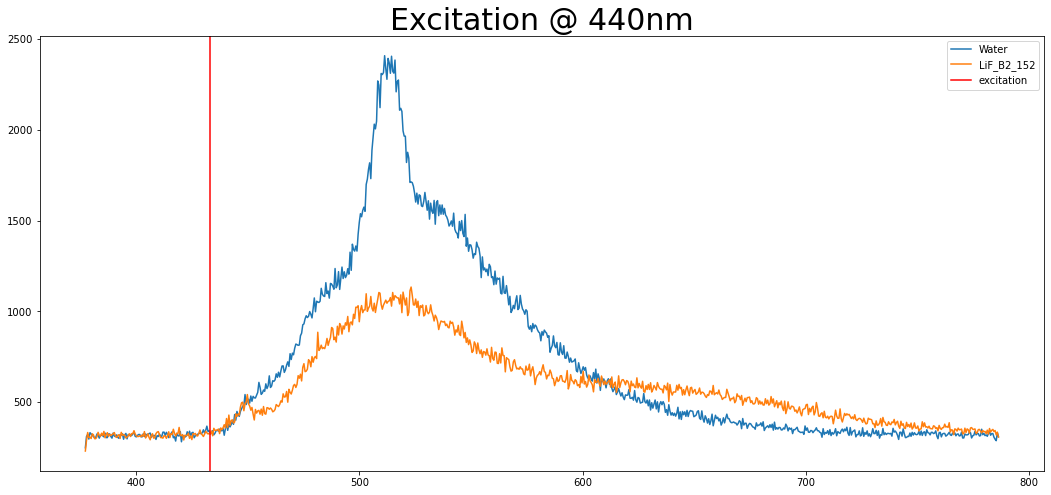

In [90]:
plt.plot(water[it]['em_wl'], water[it]['count'], label = 'Water')
plt.plot(lif[it]['em_wl'], lif[it]['count'], label = 'LiF_B2_152')
plt.axvline(433, label = 'excitation', color='red')
plt.legend()
plt.title('Excitation @ 440nm', fontsize=30)

# coll6

Text(0.5, 1.0, 'Excitation @ 440nm')

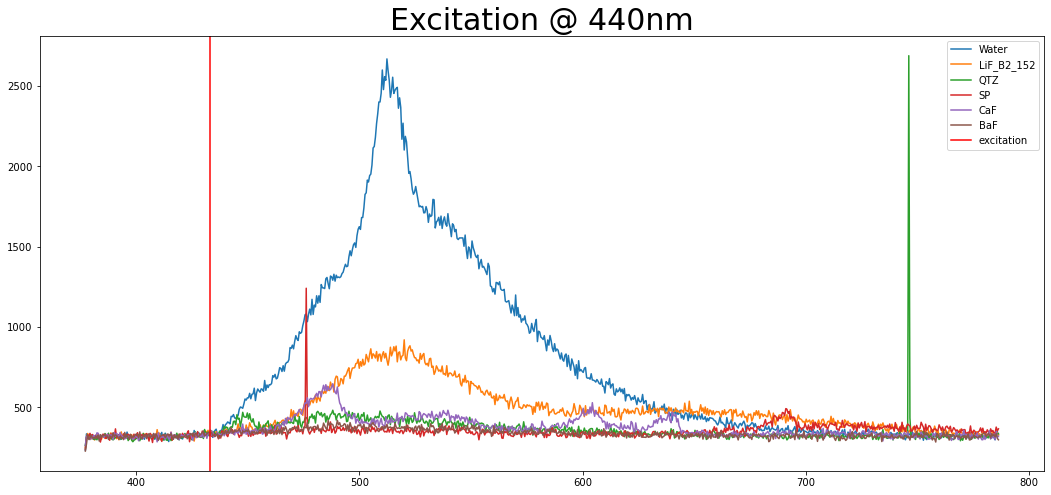

In [13]:
plt.plot(water0[it]['em_wl'], water0[it]['count'], label = 'Water')
plt.plot(lif0[it]['em_wl'], lif0[it]['count'], label = 'LiF_B2_152')
plt.plot(qtz0[it]['em_wl'], qtz0[it]['count'], label = 'QTZ')
plt.plot(sp0[it]['em_wl'], sp0[it]['count'], label = 'SP')
plt.plot(caf0[it]['em_wl'], caf0[it]['count'], label = 'CaF')
plt.plot(baf0[it]['em_wl'], baf0[it]['count'], label = 'BaF')
plt.axvline(433, label = 'excitation', color='red')
plt.legend()
plt.title('Excitation @ 440nm', fontsize=30)
#plt.ylim(275,900)

In [17]:
len(water[it]['em_wl'])

800

In [18]:
water0[it]['em_wl']

array([377.20032, 377.71927, 378.23822, 378.75717, 379.27612, 379.79504,
       380.314  , 380.83292, 381.3518 , 381.87073, 382.38962, 382.90854,
       383.4274 , 383.9463 , 384.46518, 384.98404, 385.5029 , 386.02176,
       386.54062, 387.05945, 387.57828, 388.0971 , 388.61594, 389.13474,
       389.65356, 390.17236, 390.69113, 391.20993, 391.7287 , 392.24747,
       392.76624, 393.285  , 393.80374, 394.32248, 394.84122, 395.35995,
       395.87866, 396.39737, 396.91608, 397.43478, 397.95346, 398.47214,
       398.9908 , 399.5095 , 400.02814, 400.54678, 401.06543, 401.58405,
       402.1027 , 402.6213 , 403.1399 , 403.6585 , 404.1771 , 404.69568,
       405.21426, 405.73282, 406.25137, 406.76993, 407.28845, 407.807  ,
       408.32553, 408.84402, 409.36255, 409.88104, 410.39954, 410.918  ,
       411.4365 , 411.95496, 412.4734 , 412.99185, 413.51028, 414.02872,
       414.54712, 415.06552, 415.58392, 416.10233, 416.6207 , 417.13907,
       417.65744, 418.17578, 418.69412, 419.21246, 

In [19]:
600*50/2

15000.0